In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [33]:
df=pd.read_csv("CC GENERAL.csv")

In [34]:
df.shape

(8950, 18)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [36]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [37]:
X=df.iloc[:,1:].values

In [38]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="mean")
X[:,(12,14)]=imp.fit_transform(X[:,(12,14)])

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X[:,:]=sc.fit_transform(X[:,:])

# Méthode PCA

In [47]:
from sklearn.decomposition import PCA
acp=PCA(n_components=17)
acp.fit_transform(X)
acp.explained_variance_ratio_

array([2.72900372e-01, 2.03019913e-01, 8.79197945e-02, 7.47997502e-02,
       6.26279204e-02, 5.75021129e-02, 4.88723464e-02, 4.25748554e-02,
       3.82880445e-02, 3.08000623e-02, 2.37189739e-02, 1.77363237e-02,
       1.42649185e-02, 1.21736915e-02, 1.01298988e-02, 2.67033632e-03,
       6.85223491e-07])

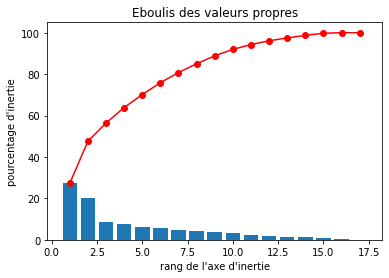

In [48]:

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)
display_scree_plot(acp)

In [49]:
acp=PCA(n_components=6)
X_acp=acp.fit_transform(X)

# Le Clustering Hiérarchique

In [50]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4 , affinity='euclidean' ,linkage='complete')
label = model.fit_predict(X_acp)
model.labels_
pd.Series(model.labels_).value_counts()

0    8923
1      21
2       5
3       1
dtype: int64

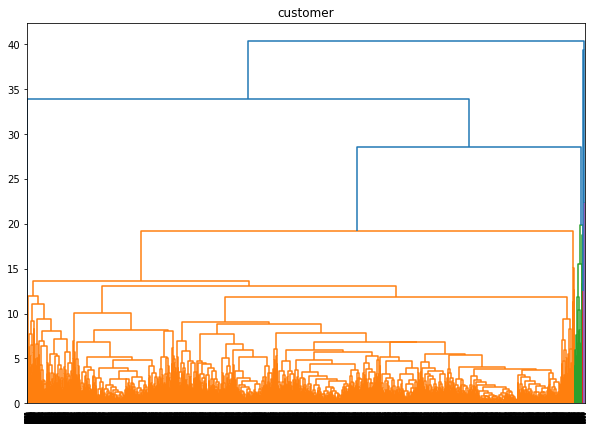

In [51]:
import scipy.cluster.hierarchy as ah
plt.figure( figsize=(10,7))
plt.title('customer')
dend = ah.dendrogram(ah.linkage(X_acp , method='complete'))

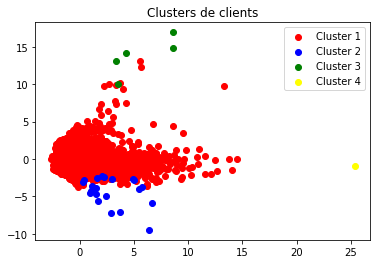

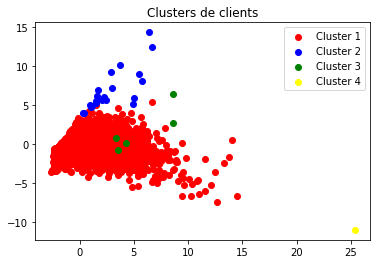

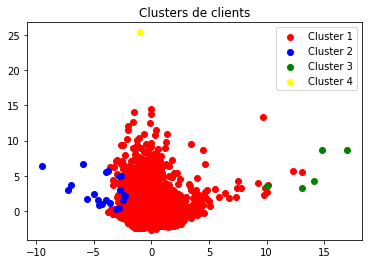

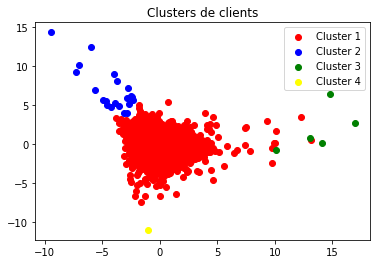

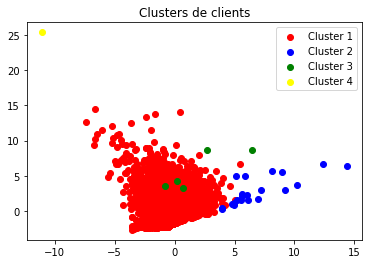

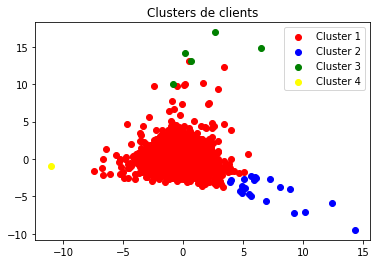

In [53]:
for i in range(1,4):
 for j in range(1,4):
     if i!=j:
         plt.scatter(y[label == 0, i], y[label == 0, j], c = 'red', label = 'Cluster 1')
         plt.scatter(y[label == 1, i], y[label == 1, j], c = 'blue', label = 'Cluster 2')
         plt.scatter(y[label == 2, i], y[label == 2, j], c = 'green', label = 'Cluster 3')
         plt.scatter(y[label == 3, i], y[label == 3, j], c = 'yellow', label = 'Cluster 4') 
         plt.title('Clusters de clients')
         plt.legend()
         plt.show()

# K-means

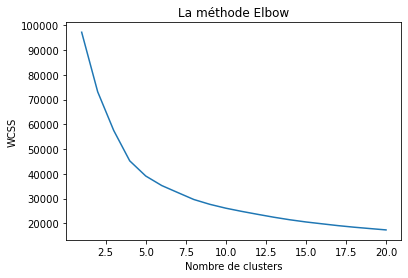

In [58]:
wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(y)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 21), wcss)
plt.title('La méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X_acp)

In [57]:
kmeans.labels_
pd.Series(kmeans.labels_).value_counts()

3    4066
0    3294
1    1223
2     367
dtype: int64

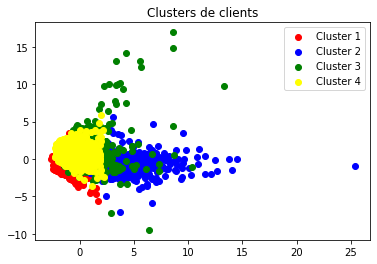

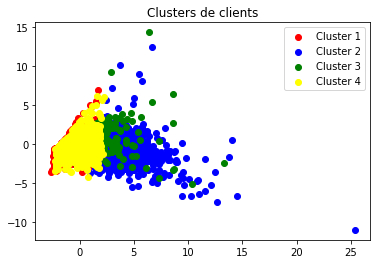

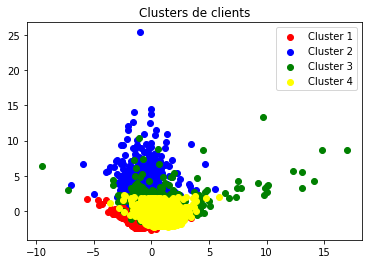

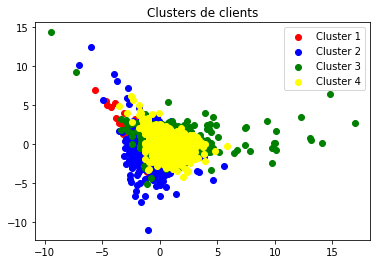

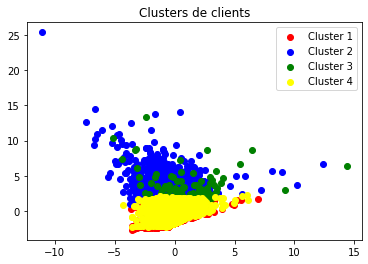

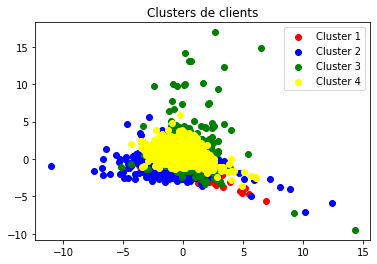

In [59]:
for i in range(1,4):
 for j in range(1,4):
     if i!=j:
         plt.scatter(y[y_kmeans == 0, i], y[y_kmeans == 0, j], c = 'red', label = 'Cluster 1')
         plt.scatter(y[y_kmeans == 1, i], y[y_kmeans == 1, j], c = 'blue', label = 'Cluster 2')
         plt.scatter(y[y_kmeans == 2, i], y[y_kmeans == 2, j], c = 'green', label = 'Cluster 3')
         plt.scatter(y[y_kmeans == 3, i], y[y_kmeans == 3, j], c = 'yellow', label = 'Cluster 4') 
         plt.title('Clusters de clients')
         plt.legend()
         plt.show()